In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [2]:
model = Sequential()
# model.add(LSTM(units=3,input_length=10,input_dim=1))
# Here n=1 , m=3
# 4*(1+3+1)*3
# model.add(LSTM(units=3,input_length=10,input_dim=2))
# Here n=2,m=3
# 4*(2+3+1)*3
model.add(LSTM(units=3,input_length=10,input_dim=3))
# Here n=3,m=3
4*(3+3+1)*3
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3)                 84        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("E:\DBDA\ML\DataSet\TCS_stock_history.csv",parse_dates=True,
                 index_col='Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2002-08-12 to 2021-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4463 non-null   float64
 1   High          4463 non-null   float64
 2   Low           4463 non-null   float64
 3   Close         4463 non-null   float64
 4   Volume        4463 non-null   int64  
 5   Dividends     4463 non-null   float64
 6   Stock Splits  4463 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 278.9 KB


In [5]:
df.head()

Open       High        Low      Close  Volume  Dividends  \
Date                                                                        
2002-08-12  28.794172  29.742206  28.794172  29.519140  212976        0.0   
2002-08-13  29.556316  30.030333  28.905705  29.119476  153576        0.0   
2002-08-14  29.184536  29.184536  26.563503  27.111877  822776        0.0   
2002-08-15  27.111877  27.111877  27.111877  27.111877       0        0.0   
2002-08-16  26.972458  28.255089  26.582090  27.046812  811856        0.0   

            Stock Splits  
Date                      
2002-08-12             0  
2002-08-13             0  
2002-08-14             0  
2002-08-15             0  
2002-08-16             0

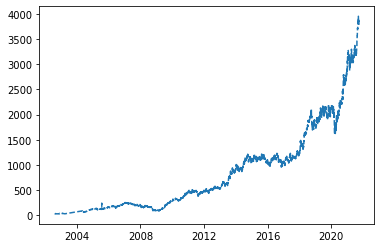

In [6]:
plt.plot(df['Close'], ls="--")

In [7]:
# data from 2005 is included
all_data = df.loc['2010-01-01':]

In [8]:
# all data is included 
all_data=all_data[['Close']].dropna()

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler()
scaled_Open_data = sc.fit_transform(all_data)
# minmaxsacler krne ke baad o/p will be in b/w 0-1

In [11]:
scaled_Open_data.shape

(2896, 1)

In [12]:
0.8*2896

2316.8

In [13]:
train_data = scaled_Open_data[:2316]
test_data = scaled_Open_data[2316:]

In [14]:
train_data.shape

(2316, 1)

In [15]:
# preprocessing step
# makes the data as per timestamps (now arrange data in 10 timestamps)
# 0th to 39th position=X_train
# 40th postion = Y_train
X_train=[]
y_train=[]
for i in range(40,len(train_data)):
    X_train.append(train_data[i-40:i,0])
    y_train.append(train_data[i,0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [16]:
print(X_train.shape,y_train.shape)

(2276, 40) (2276,)


In [17]:
X_test = []
y_test = []
for i in range(40, len(test_data)):
    # notice the starting point is the timestamps you are interested in
    X_test.append(test_data[i-40:i, 0])
    y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(540, 40) (540,)


In [18]:
# reshape it to add one feature/dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
print(X_train.shape, X_test.shape)

(2276, 40, 1) (540, 40, 1)


In [19]:
# Build the model
model = Sequential()
model.add(LSTM(units=5,input_length=40,input_dim=1))
model.add(Dense(1))
# output is only next day closing price
model.summary()
model.compile(optimizer='rmsprop',loss='mse')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 5)                 140       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train,batch_size=32,epochs=50)

Epoch 1/50
72/72 [==============================] - 3s 12ms/step - loss: 1.7111e-04
Epoch 2/50
72/72 [==============================] - 1s 12ms/step - loss: 6.9941e-05
Epoch 3/50
72/72 [==============================] - 1s 11ms/step - loss: 5.8263e-05
Epoch 4/50
72/72 [==============================] - 1s 12ms/step - loss: 5.5710e-05
Epoch 5/50
72/72 [==============================] - 1s 12ms/step - loss: 5.7359e-05
Epoch 6/50
72/72 [==============================] - 1s 11ms/step - loss: 5.2641e-05
Epoch 7/50
72/72 [==============================] - 1s 11ms/step - loss: 5.0585e-05
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 5.2586e-05
Epoch 9/50
72/72 [==============================] - 1s 11ms/step - loss: 5.3205e-05
Epoch 10/50
72/72 [==============================] - 1s 12ms/step - loss: 5.0290e-05
Epoch 11/50
72/72 [==============================] - 1s 10ms/step - loss: 4.8108e-05
Epoch 12/50
72/72 [==============================] - 1s 11ms/step - loss: 

In [21]:
yhat = model.predict(X_test)
# yhat is in scaled format
pred_price = sc.inverse_transform(yhat)

17/17 [==============================] - 0s 4ms/step


In [22]:
y_test.shape

(540,)

In [23]:
real_price = sc.inverse_transform([y_test])

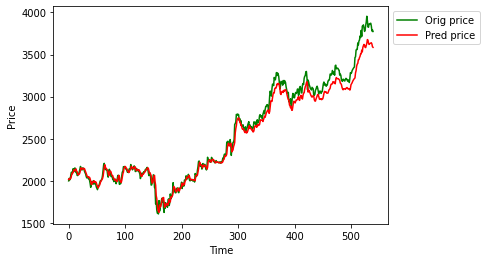

In [24]:
plt.plot(real_price.flatten(), color='g', label = 'Orig price')
plt.plot(pred_price, color='r', label = 'Pred price')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

In [25]:
df.tail()

Open         High          Low        Close   Volume  \
Date                                                                      
2021-09-24  3890.000000  3944.399902  3855.000000  3871.300049  2320754   
2021-09-27  3900.000000  3904.000000  3802.899902  3836.949951  1673362   
2021-09-28  3850.000000  3850.000000  3751.250000  3779.149902  2253075   
2021-09-29  3759.800049  3806.000000  3722.149902  3791.899902  2489161   
2021-09-30  3805.000000  3805.000000  3765.000000  3773.199951   640479   

            Dividends  Stock Splits  
Date                                 
2021-09-24        0.0             0  
2021-09-27        0.0             0  
2021-09-28        0.0             0  
2021-09-29        0.0             0  
2021-09-30        0.0             0

In [26]:
# take last 10 timestamps and predict next days price
# shape should be [1,10,1] [rows, timestamp, dimension]

new_test = df["Close"].tail(10).values
new_test.shape

(10,)

In [27]:
new_test = new_test.reshape(1,10,1)
new_test.shape

(1, 10, 1)

In [28]:
exp_value_nxt_day = model.predict(new_test)
sc.inverse_transform(exp_value_nxt_day)

1/1 [==============================] - 0s 312ms/step


array([[4974.4653]], dtype=float32)

In [29]:
# Mulitple LSTM layers

model = Sequential()
model.add(LSTM(units=3, input_length=40, input_dim=1, return_sequences=True))

# For the next LSTM layer, previous layers return_sequence = True

model.add(LSTM(units=2))
model.add(Dense(1))

# output is prediction of only next day's open price
# If no activation function, then weighted summation is the output
#model.summary()

model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, batch_size=64, epochs=10)
# Epoch – The number of times the algorithm runs on the whole training dataset.

Epoch 1/10
36/36 [==============================] - 6s 36ms/step - loss: 0.0188
Epoch 2/10
36/36 [==============================] - 1s 20ms/step - loss: 0.0046
Epoch 3/10
36/36 [==============================] - 1s 21ms/step - loss: 8.4607e-04
Epoch 4/10
36/36 [==============================] - 1s 21ms/step - loss: 2.3012e-04
Epoch 5/10
36/36 [==============================] - 1s 22ms/step - loss: 2.1008e-04
Epoch 6/10
36/36 [==============================] - 1s 22ms/step - loss: 1.9761e-04
Epoch 7/10
36/36 [==============================] - 1s 25ms/step - loss: 1.9582e-04
Epoch 8/10
36/36 [==============================] - 1s 38ms/step - loss: 1.9039e-04
Epoch 9/10
36/36 [==============================] - 1s 37ms/step - loss: 1.8319e-04
Epoch 10/10
36/36 [==============================] - 1s 37ms/step - loss: 1.8141e-04
